In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
from sklearn.cluster import KMeans
wcss=[]

In [6]:
for i in range(1,11):
    kmeans =KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(((kmeans.inertia_)))

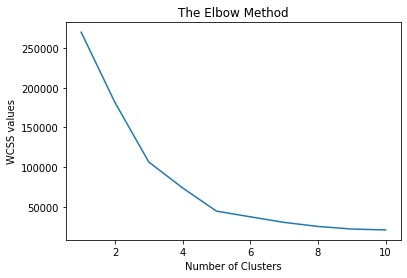

In [7]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values')
plt.show()

In [12]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++' , random_state=42)

In [13]:
y_kmeans = kmeansmodel.fit_predict(x)

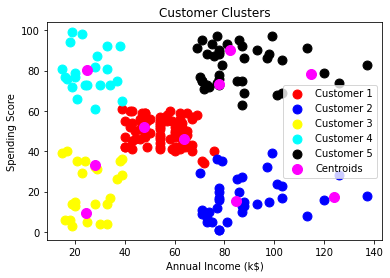

In [14]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s=80, c='red', label='Customer 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s=80, c='blue', label='Customer 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s=80, c='yellow', label='Customer 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1], s=80, c='cyan', label='Customer 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1], s=80, c='black', label='Customer 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='magenta', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

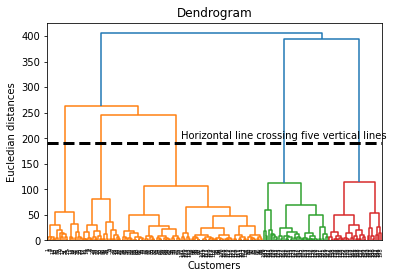

In [15]:
import scipy.cluster.hierarchy as sch

sch.dendrogram(sch.linkage(x, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.hlines(y=190,xmin=0 , xmax=2000, lw=3, linestyles="--", color='black')
plt.text(x=800, y=200, s="Horizontal line crossing five vertical lines", fontsize=10)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [17]:
print("X: ", x[:10])
print("\n \n")
print("y_hc: ", y_hc)

X:  [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]

 

y_hc:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


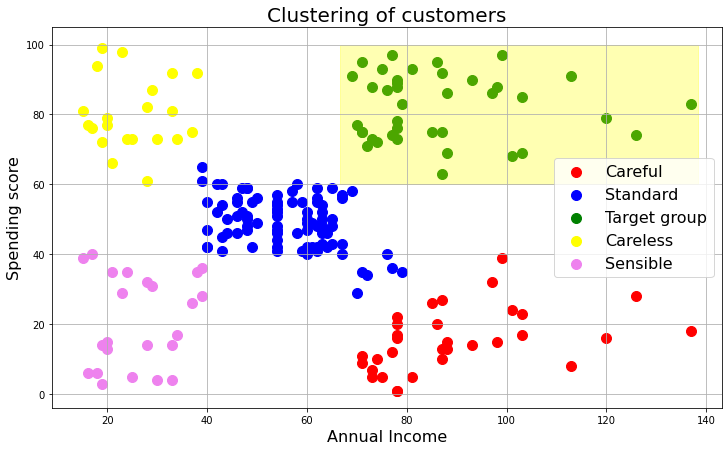

In [18]:

plt.figure(figsize=(12,7))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c='red', label='Careful')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c='green', label='Target group')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=100, c='yellow', label='Careless')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=100, c='violet', label='Sensible')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=16)
plt.ylabel("Spending score", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()

